In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/complaints/complaints.csv
/kaggle/input/corpora/corpora/wordnet/wordnet/data.adj
/kaggle/input/corpora/corpora/wordnet/wordnet/LICENSE
/kaggle/input/corpora/corpora/wordnet/wordnet/index.adj
/kaggle/input/corpora/corpora/wordnet/wordnet/README
/kaggle/input/corpora/corpora/wordnet/wordnet/verb.exc
/kaggle/input/corpora/corpora/wordnet/wordnet/index.adv
/kaggle/input/corpora/corpora/wordnet/wordnet/index.verb
/kaggle/input/corpora/corpora/wordnet/wordnet/data.verb
/kaggle/input/corpora/corpora/wordnet/wordnet/lexnames
/kaggle/input/corpora/corpora/wordnet/wordnet/data.noun
/kaggle/input/corpora/corpora/wordnet/wordnet/noun.exc
/kaggle/input/corpora/corpora/wordnet/wordnet/index.noun
/kaggle/input/corpora/corpora/wordnet/wordnet/adj.exc
/kaggle/input/corpora/corpora/wordnet/wordnet/index.sense
/kaggle/input/corpora/corpora/wordnet/wordnet/adv.exc
/kaggle/input/corpora/corpora/wordnet/wordnet/cntlist.rev
/kaggle/input/corpora/corpora/wordnet/wordnet/data.adv
/kaggle/input/co

In [2]:
import pandas as pd

# Load the dataset (update the file path if needed)
df = pd.read_csv("/kaggle/input/complaints/complaints.csv")

# Display the first 5 rows
df.head()


<ipython-input-2-7c2e9a6b6551>:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/complaints/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,NY,12543,NaN,NaN,Web,2025-01-29,In progress,Yes,NaN,11825440
1,2025-01-30,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89148,NaN,NaN,Web,2025-01-30,In progress,Yes,NaN,11844247
2,2025-01-29,"Payday loan, title loan, personal loan, or adv...",Installment loan,Problem when making payments,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,FL,33055,NaN,NaN,Phone,2025-02-04,In progress,Yes,NaN,11824206
3,2025-01-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Resurgent Capital Services L.P.,NC,27455,NaN,NaN,Postal mail,2025-01-27,In progress,Yes,NaN,11799137
4,2025-01-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,IL,60609,NaN,NaN,Web,2025-01-28,In progress,Yes,NaN,11810502


In [3]:
# Check for missing values in each column
df.isnull().sum()


Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        815662
Consumer complaint narrative    5332868
Company public response         3933594
Company                               0
State                             51303
ZIP code                          30228
Tags                            7265783
Consumer consent provided?      1426657
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              7080011
Complaint ID                          0
dtype: int64

In [4]:
# Keep only the required columns
df = df[['Product', 'Consumer complaint narrative']]

# Drop rows where 'Consumer complaint narrative' is missing
df = df.dropna()

# Check the new shape of the dataset
df.shape


(2515449, 2)

In [5]:
# Count the number of complaints per category
df['Product'].value_counts()


Product
Credit reporting, credit repair services, or other personal consumer reports    807286
Credit reporting or other personal consumer reports                             756416
Debt collection                                                                 304468
Mortgage                                                                        125660
Checking or savings account                                                     122311
Credit card or prepaid card                                                     108669
Credit card                                                                      67506
Student loan                                                                     48135
Money transfer, virtual currency, or money service                               47318
Vehicle loan or lease                                                            36092
Credit reporting                                                                 31587
Payday loan, title loan, or persona

In [6]:
# Define category mapping
category_mapping = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Credit reporting or other personal consumer reports': 0,
    'Credit reporting': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Payday loan, title loan, or personal loan': 2,
    'Payday loan, title loan, personal loan, or advance loan': 2,
    'Payday loan': 2,
    'Mortgage': 3
}

# Apply mapping
df['Category'] = df['Product'].map(category_mapping)

# Drop rows that are not in our four categories
df = df.dropna(subset=['Category'])

# Convert 'Category' column to integer
df['Category'] = df['Category'].astype(int)

# Check the distribution again
df['Category'].value_counts()


Category
0    1595289
1     304468
3     125660
2      35083
Name: count, dtype: int64

In [7]:
# Keep only the required columns
df = df[['Consumer complaint narrative', 'Category']]

# Rename column for easier access
df.rename(columns={'Consumer complaint narrative': 'Complaint'}, inplace=True)

# Show dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2060500 entries, 9 to 7848310
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Complaint  object
 1   Category   int64 
dtypes: int64(1), object(1)
memory usage: 47.2+ MB


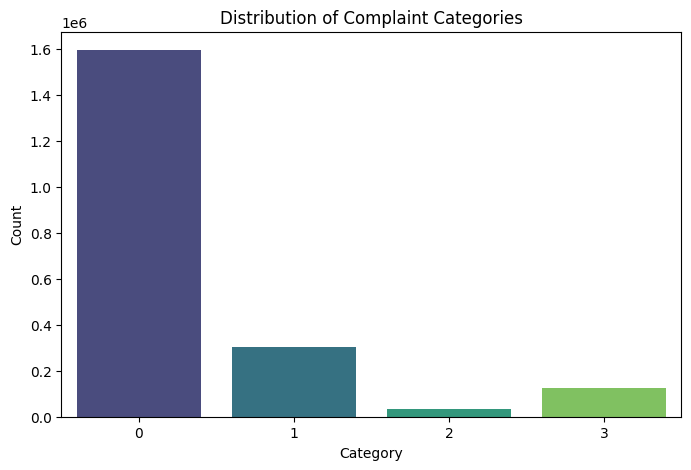

Category
0    1595289
1     304468
3     125660
2      35083
Name: count, dtype: int64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot category distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['Category'], palette='viridis')
plt.title("Distribution of Complaint Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Print category counts
print(df['Category'].value_counts())


In [9]:
from nltk.corpus.reader import WordNetCorpusReader

wordnet_path = "/kaggle/input/corpora/corpora/wordnet/wordnet"
wn = WordNetCorpusReader(wordnet_path, None)

# Verify WordNet
print("WordNet Synsets for 'dog':", list(wn.synsets('dog')))


WordNet Synsets for 'dog': [Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]


In [11]:
from nltk.corpus.reader import WordNetCorpusReader

# Correct WordNet path
wordnet_path = "/kaggle/input/corpora/corpora/wordnet/wordnet"
wn = WordNetCorpusReader(wordnet_path, None)

class CustomWordNetLemmatizer:
    def lemmatize(self, word, pos='n'):
        synsets = wn.synsets(word, pos)
        return synsets[0].lemmas()[0].name() if synsets else word  # Return first lemma or the word itself

# Initialize the lemmatizer
lemmatizer = CustomWordNetLemmatizer()

# Test cases
print(lemmatizer.lemmatize("dogs"))  # Should return 'dog'
print(lemmatizer.lemmatize("running", pos='v'))  # Should return 'run'
print(lemmatizer.lemmatize("better", pos='a'))  # Should return 'good'


dog
run
better


In [12]:
import re
import pandas as pd
from nltk.corpus.reader import WordNetCorpusReader
from nltk.corpus import PlaintextCorpusReader

# Define paths to local NLTK data
wordnet_path = "/kaggle/input/corpora/corpora/wordnet/wordnet"
stopwords_path = "/kaggle/input/corpora/corpora/stopwords/stopwords"

# Load WordNet from local files
wn = WordNetCorpusReader(wordnet_path, None)

# Load stopwords from local files
stopwords_reader = PlaintextCorpusReader(stopwords_path, ['english'])
stop_words = set(stopwords_reader.words('english'))

# Custom lemmatizer using WordNetCorpusReader
class CustomWordNetLemmatizer:
    def lemmatize(self, word, pos='n'):
        synsets = wn.synsets(word, pos)
        return synsets[0].lemmas()[0].name() if synsets else word  # Return first lemma or the word itself

# Initialize lemmatizer
lemmatizer = CustomWordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = text.split()  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize & remove stopwords
    return ' '.join(words)

# Assuming df is already defined as a pandas DataFrame
df['Complaint'] = df['Complaint'].apply(preprocess_text)

# Show first 5 processed complaints
df['Complaint'].head()


9     subject ailment regarding inaccurate late paym...
13    subject ball ailment xxxx transunion non confo...
14    subject follow dispute submitted twenty twenty...
19    twenty twenty year subject xxxx xxxx xxxx tran...
20    xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx x...
Name: Complaint, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000,  # Limit the vocabulary size
    max_df=0.95,  # Ignore very frequent terms
    min_df=5,  # Ignore rare terms
    dtype=np.float32  # Reduce memory usage
)

X = vectorizer.fit_transform(df['Complaint'])



In [14]:
print(X.shape)  # (num_samples, num_features)


(2060500, 10000)


In [15]:
from sklearn.model_selection import train_test_split

# Assuming `df['Category']` contains labels (0: Credit reporting, 1: Debt collection, etc.)
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("🔹 Multinomial Naïve Bayes Performance:")
print(classification_report(y_test, y_pred_nb))


🔹 Multinomial Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    319065
           1       0.74      0.69      0.71     60813
           2       0.54      0.44      0.49      7022
           3       0.78      0.95      0.86     25200

    accuracy                           0.90    412100
   macro avg       0.75      0.75      0.75    412100
weighted avg       0.89      0.90      0.89    412100



In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    319065
           1       0.83      0.73      0.78     60813
           2       0.74      0.56      0.64      7022
           3       0.91      0.92      0.92     25200

    accuracy                           0.93    412100
   macro avg       0.86      0.80      0.82    412100
weighted avg       0.92      0.93      0.92    412100



In [18]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔹 Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))


🔹 Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    319065
           1       0.83      0.73      0.78     60813
           2       0.76      0.51      0.61      7022
           3       0.91      0.92      0.91     25200

    accuracy                           0.92    412100
   macro avg       0.86      0.78      0.81    412100
weighted avg       0.92      0.92      0.92    412100



In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("🔹 XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


🔹 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    319065
           1       0.83      0.75      0.79     60813
           2       0.73      0.54      0.62      7022
           3       0.92      0.91      0.91     25200

    accuracy                           0.93    412100
   macro avg       0.86      0.79      0.82    412100
weighted avg       0.92      0.93      0.92    412100



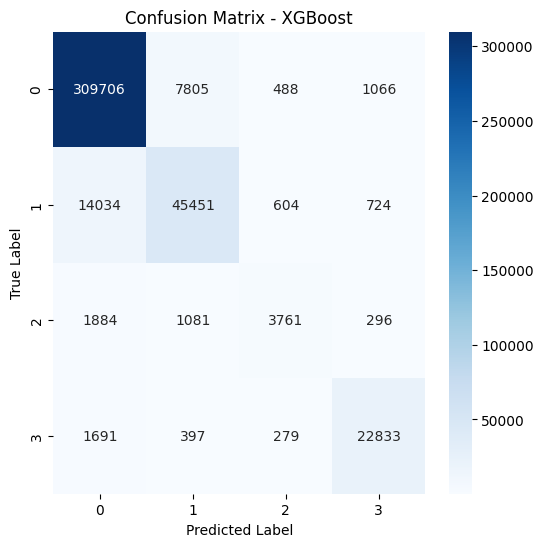

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for the best model (Logistic Regression or XGBoost)
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


In [22]:
import pickle

# Save model and vectorizer
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))


In [23]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def predict_category(text):
    """Predicts the complaint category based on input text."""
    
    # Validate input
    if not isinstance(text, str) or text.strip() == "":
        logging.error("Invalid input: Please provide a non-empty text string.")
        return "Invalid input"

    # Preprocess text
    text = text.lower().strip()

    # Transform input using the trained TF-IDF vectorizer
    text_transformed = vectorizer.transform([text])

    # Predict using the trained XGBoost model
    prediction = xgb_model.predict(text_transformed)

    # Define category mapping
    categories = {
        0: "Credit Reporting, Repair, or Other",
        1: "Debt Collection",
        2: "Consumer Loan",
        3: "Mortgage"
    }

    # Get category label
    category_label = categories.get(prediction[0], "Unknown Category")

    logging.info(f"Predicted category: {category_label}")

    return category_label

# Example Prediction
new_complaint = "My credit score was lowered due to an error in reporting."
print("Predicted Category:", predict_category(new_complaint))


Predicted Category: Credit Reporting, Repair, or Other
